In [29]:
# Dependencies
from splinter import Browser
from webdriver_manager.chrome import ChromeDriverManager
from bs4 import BeautifulSoup
import requests
import pandas as pd
import csv
from datetime import datetime

In [3]:
# Setup splinter
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

In [4]:
# Mars Temperature URL to scrape
url = 'https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'
browser.visit(url)
html = browser.html

In [5]:
# Create BeautifulSoup object; parse with 'html.parser'
soup = BeautifulSoup(html, 'html.parser')

In [6]:
# Examine the results and look for the table
result = soup.find('table', class_='table')
for query in result:
    print(query)




<tbody><tr>
<th>id</th>
<th>terrestrial_date</th>
<th>sol</th>
<th>ls</th>
<th>month</th>
<th>min_temp</th>
<th>pressure</th>
</tr>
<tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.0</td>
<td>739.0</td>
</tr>
<tr class="data-row">
<td>13</td>
<td>2012-08-17</td>
<td>11</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>24</td>
<td>2012-08-18</td>
<td>12</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>741.0</td>
</tr>
<tr class="data-row">
<td>35</td>
<td>2012-08-19</td>
<td>13</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>732.0</td>
</tr>
<tr class="data-row">
<td>46</td>
<td>2012-08-20</td>
<td>14</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>57</td>
<td>2012-08-21</td>
<td>15</td>
<td>158</td>
<td>6</td>
<td>-78.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>68</td>
<td>2012-08-22</td>
<td>16</td>
<td>158</td>
<td>6</td>
<td>-77.0</td>
<td>74

In [7]:
headers = []
data = []

# Retrieve headers
for tr in result.find_all("tr"):
    header=([th.text for th in tr.find_all('th')])
    headers.append(header)

# Retrieve each list item
for tr in result.find_all("tr"):
    row=([td.text for td in tr.find_all('td')])
    data.append(row)

#Take only first headers
headers = headers[0:1]
print(headers)


[['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']]


In [8]:
browser.quit()

In [9]:
# Used print of headings to get column headers
mars_temp_df = pd.DataFrame(data, columns=['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure'])
mars_temp_df.head()
mars_temp_df.describe()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
count,1867,1867,1867,1867,1867,1867,1867
unique,1867,1867,1867,360,12,29,199
top,374,2014-04-06,374,86,4,-77.0,883.0
freq,1,1,1,8,194,138,25


In [10]:
# Remove empty rows
mars_temp_df = mars_temp_df.dropna(axis=0,how='all')
mars_temp_df.describe()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
count,1867,1867,1867,1867,1867,1867,1867
unique,1867,1867,1867,360,12,29,199
top,374,2014-04-06,374,86,4,-77.0,883.0
freq,1,1,1,8,194,138,25


In [11]:
# Check types
dtypes = mars_temp_df.dtypes
print(dtypes)

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object


In [32]:
# Change the type of data
mars_temp_df = mars_temp_df.astype({'id':int})
mars_temp_df = mars_temp_df.astype({'terrestrial_date':'datetime64'})
mars_temp_df = mars_temp_df.astype({'sol':int})
mars_temp_df = mars_temp_df.astype({'ls':int})
mars_temp_df = mars_temp_df.astype({'month':int})
mars_temp_df = mars_temp_df.astype({'min_temp':float})
mars_temp_df = mars_temp_df.astype({'pressure':float})

# Confirm types post change
dtypes = mars_temp_df.dtypes
print(dtypes)

id                           int32
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object


In [13]:
# View dataframe data
mars_temp_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
1,2,2012-08-16,10,155,6,-75.0,739.0
2,13,2012-08-17,11,156,6,-76.0,740.0
3,24,2012-08-18,12,156,6,-76.0,741.0
4,35,2012-08-19,13,157,6,-74.0,732.0
5,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1863,1889,2018-02-23,1973,133,5,-78.0,730.0
1864,1892,2018-02-24,1974,134,5,-77.0,729.0
1865,1894,2018-02-25,1975,134,5,-76.0,729.0
1866,1893,2018-02-26,1976,135,5,-77.0,728.0


###Mars Questions

In [14]:
print('How many months exist on Mars?')
max_month = mars_temp_df["month"].max()
print(f'There are {max_month} months on Mars')

How many months exist on Mars?
There are 12 months on Mars


In [15]:
print('How many Martian (and not Earth) days worth of data exist in the scraped dataset?')
data_days = mars_temp_df["sol"].max() - mars_temp_df["sol"].min() + 1
print(f'There are {data_days} Martian days of data in this dataset')

How many Martian (and not Earth) days worth of data exist in the scraped dataset?
There are 1968 Martian days of data in this dataset


What are the coldest and the warmest months on Mars (at the location of Curiosity)?
From the data below the 3rd month is the coldest and the 8th month is the warmest


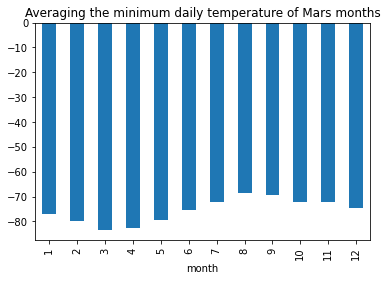

In [24]:
print('What are the coldest and the warmest months on Mars (at the location of Curiosity)?')
avg_temp = mars_temp_df.groupby(["month"])["min_temp"].mean()
print(f'From the data below the 3rd month is the coldest and the 8th month is the warmest')
avg_temp.plot.bar(x='Month on Mars', y='Average Minimum Temp', title='Averaging the minimum daily temperature of Mars months');

Which months have the lowest and the highest atmospheric pressure on Mars?
From the data below the 6th month is the lowest and the 9th month is the highest in terms of atmospheric pressure


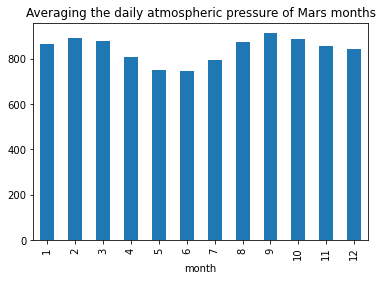

In [26]:
print('Which months have the lowest and the highest atmospheric pressure on Mars?')
avg_pressure = mars_temp_df.groupby(["month"])["pressure"].mean()
print(f'From the data below the 6th month is the lowest and the 9th month is the highest in terms of atmospheric pressure')
avg_pressure.plot.bar(x='Month on Mars', y='Average Pressure', title='Averaging the daily atmospheric pressure of Mars months');

About how many terrestrial (Earth) days exist in a Martian year?
The data is across 2021 Earth days and from the plot below it seems like there are 2.5 years worth of Martian data
With this information I estimate that there are 808.4 Earth days in a Martian year


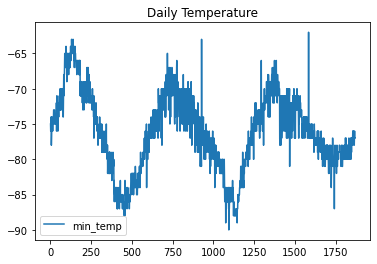

In [46]:
print('About how many terrestrial (Earth) days exist in a Martian year?')
start_date_earth = mars_temp_df['terrestrial_date'].min()
end_date_earth = mars_temp_df['terrestrial_date'].max()
earth_days = (end_date_earth - start_date_earth).days
min_temp = mars_temp_df[['min_temp']]
print(f'The data is across {earth_days} Earth days and from the plot below it seems like there are 2.5 years worth of Martian data')
martian_years = 2.5
earth_days_in_martian_year = earth_days/2.5
print(f'With this information I estimate that there are {earth_days_in_martian_year} Earth days in a Martian year')
min_temp.plot(title='Daily Temperature');

In [21]:
# Confirm output file and export data into a csv
output_csv='output_data/mars_data.csv'

mars_temp_df.to_csv(output_csv,header=True,index=False)